## Computational Social Media_Assignment 2
Nguyen Hoang An
an.nguyen.200011@student.fulbright.edu.vn

Assignment # 2: hands-on exercise with Twitter data

## Goals:

1. Students are asked to collect a small set of public tweets and perform descriptive analysis, in the context of the covid-19 ongoing situation.

2. Through the exercise, students will (a) gain practical skills on how to collect Twitter data; (b) understand collective Twitter practices (using hashtags, sharing URLs, retweeting); and (c) reflect on the use of Twitter data in the context of world health events.

## Mission 1: Input data
I collect 17.811 tweet data from Fri Nov 19 20:18:11 +0000 2021 to Sat Nov 20 02:29:33 +0000 2021

In [2]:
###
# Import library and csv data file
#
# data: data input
# ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
data = pd.read_csv("data.csv")

In [3]:
###
# Print data to check
# ###
print(data)

                                 time                   id  \
0      Fri Nov 19 20:18:11 +0000 2021  1461790930772582405   
1      Fri Nov 19 20:21:41 +0000 2021  1461791811450642433   
2      Fri Nov 19 20:21:42 +0000 2021  1461791817658216449   
3      Fri Nov 19 20:21:43 +0000 2021  1461791822167040003   
4      Fri Nov 19 20:21:44 +0000 2021  1461791826994728974   
...                               ...                  ...   
17807  Sat Nov 20 02:29:30 +0000 2021  1461884375436455936   
17808  Sat Nov 20 02:29:30 +0000 2021  1461884378481496066   
17809  Sat Nov 20 02:29:31 +0000 2021  1461884378703826944   
17810  Sat Nov 20 02:29:32 +0000 2021  1461884383707779072   
17811  Sat Nov 20 02:29:33 +0000 2021  1461884388535418896   

                                                    text    url  retweet  \
0      RT @watch_union: Fast 2 Jahre #Coronavirus-Pan...   True     True   
1      RT @LuzBelindaFE: Nunca os dejéis “vacunar” si...  False     True   
2      More than meets the 

## Mission 2: Compute the following descriptive statistics on the dataset:

1. Percentage of tweets that contain URLs
2. Percentage of tweets that are (or contain) retweets.
3. Percentage of tweets that contain vaccination hashtags/keywords (%pfizer, %moderna, %astrazeneca, %janssen, %verocell).
4. Distribution of languages declared in the tweet metadata (%EN, %FR,....)
5. Table of the 30 most frequent hashtags in the following format: [rank, hashtag, frequency]. Example: [1, #coronavirus, 2500]

Percentage of tweets that contain URLs: 36.44%
Percentage of tweets that are (or contain) retweets: 65.93%
Percentage of tweets that contain Pfizer hashtag: 0.53%
Percentage of tweets that contain Moderna hashtag: 0.26%
Percentage of tweets that contain Astrazeneca hashtag: 0.02%
Percentage of tweets that contain Janssen hashtag: 0.0%
Percentage of tweets that contain Verocell hashtag: 0.0%


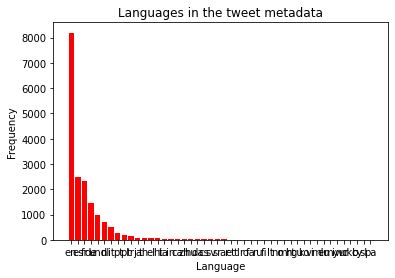

Distribution of languages declared in the tweet metadata
   language distribution
0        en       45.99%
1        es       13.93%
2        fr       12.99%
3        de        8.21%
4       und        5.42%
5        nl        3.97%
6        it         2.9%
7        pt        1.49%
8        pl        0.99%
9        tr        0.84%
10       ja        0.45%
11       th         0.4%
12       el        0.31%
13       hi        0.29%
14       ta        0.25%
15       in        0.21%
16       ca        0.19%
17       zh        0.16%
18       hu         0.1%
19       da         0.1%
20       cs        0.09%
21       sv        0.07%
22       sr        0.07%
23       ar        0.07%
24       et        0.06%
25       tl        0.05%
26       ro        0.04%
27       fa        0.04%
28       ru        0.04%
29       fi        0.04%
30       lt        0.03%
31       no        0.03%
32       mr        0.02%
33       ht        0.02%
34       gu        0.02%
35       ko        0.01%
36       vi       

In [5]:
###
# Compute the percentage of these data.
# I transfer raw data to 'pandas.core.series.Series' data to easy to compute the number of each data
#
# url          the number of true/false value in url column
# pfizer       the number of true/false value in pfizer column
# moderna      the number of true/false value in moderna column
# astrazeneca  the number of true/false value in astrazeneca column
# janssen      the number of true/false value in janssen column
# verocell     the number of true/false value in verocell column
# language     the number of each kind of language in data base
# hashtag      the number of each kind of hashtag in data base
# top_hashtag_freq    the 30 most frequent hashtags
# ###

url=data['url'].value_counts()
retweet=data['retweet'].value_counts()
pfizer=data['pfizer'].value_counts()
moderna=data['moderna'].value_counts()
astrazeneca=data['astrazeneca'].value_counts()
janssen=data['janssen'].value_counts()
verocell=data['verocell'].value_counts()
language=data['language'].value_counts()

hashtag=[]
#Collect each hashtag
for tags in data['hashtags']:
    for tag in str(tags).split(";"):
        if len(tag)>0 and tag!='nan':
            hashtag.append(tag)
#Tranfer data to 'pandas.core.series.Series'
hashtag = pd.Series(np.array(hashtag))
#Print answer
#get(1): get number of the True data
#get(0): get number of the False data
print("Percentage of tweets that contain URLs: "+str(round(url.get(1)/len(data)*100,2))+"%")
print("Percentage of tweets that are (or contain) retweets: "+str(round(retweet.get(1)/len(data)*100,2))+"%")
print("Percentage of tweets that contain Pfizer hashtag: "+str(round(pfizer.get(1)/len(data)*100,2))+"%")
print("Percentage of tweets that contain Moderna hashtag: "+str(round(moderna.get(1)/len(data)*100,2))+"%")
print("Percentage of tweets that contain Astrazeneca hashtag: "+str(round(astrazeneca.get(1)/len(data)*100,2))+"%")
print("Percentage of tweets that contain Janssen hashtag: "+str(round((len(data)-janssen.get(0))/len(data)*100,2))+"%")
print("Percentage of tweets that contain Verocell hashtag: "+str(round((len(data)-verocell.get(0))/len(data)*100,2))+"%")

#Draw the distribution of languages in database
plt.bar(np.array(language.keys()),np.array(language[language.keys()]), color='red')
plt.xlabel("Language")
plt.ylabel("Frequency")
plt.title("Languages in the tweet metadata")
plt.show()

per_lan=[]
for i in language.keys():
    per_lan.append(str(round(language.get(i)/len(data)*100,2))+'%')
print('Distribution of languages declared in the tweet metadata')
print(pd.DataFrame({'language':language.keys(), 'distribution':per_lan}))
print()
#Print the top 30 most frequent hashtags
print("Table of the 30 most frequent hashtags:")
top_hashtag_keys=hashtag.value_counts()[:30].keys()
top_hashtag_freq=[]
#Reform database: [rank, hashtag, frequency]
for i in top_hashtag_keys:
    top_hashtag_freq.append(hashtag.value_counts().get(i))
print( pd.DataFrame({'rank':range(1,31),'hashtag':top_hashtag_keys, 'frequency':top_hashtag_freq}))



## Mission 3: Using the Twitter handles you chose in step 3, compute the following statistics:
1. Percentage of tweets directly generated by all the 20 media accounts together.
e.g.: 3% of tweets were produced by the 20 media accounts altogether
2. Percentage of tweets directly generated by the 20 NGOs/gov. accounts.
e.g.: 5% of tweets were produced by the 20 NGOs/government accounts.
3. Percentage of tweets generated by all the 20 media accounts that appear as retweets in the sample.
4. Percentage of tweets generated by all the 20 NGOs/gov. accounts that appear as retweets in the sample.

In [6]:
###
#  Find 20 media organizations and 20 NGO or government public officials that are tweeting about the covid-19 pandemic (e.g., @nytimes)
#  First I collect media organization and NGO/government officials base on keywords in its description
#  Second, I sort them by pandas DataFrame to have the most popular media organization and NGO/government officials. I assume that the most popular is real media organization/ NGO/GOV officials.
#  Finally, I search their name in twitter, confirm and put it in list of 20 media organizations and 20 NGO or government public officials
#
#  creator  The people/organization who create directly create contents, I collect screen name, retweet status to know retweet/direct, and description
#  media    The account which have 'media', 'news' keywords in its description
#  ngo_gov  The account which have 'ngo', 'gov', keywords in its description
#  media_keyword      The keywords to find media
#  ngo_gov_keyword    The keywords to find ngo_gov
#
###
media=[]
ngo_gov=[]
media_keyword=['media','news']
ngo_gov_keyword=['ngo','gov']
creator=pd.DataFrame({'creator':data['creator'], 'retweet':data['retweet'], 'description':data['creator_description']})
creator=creator.value_counts() #sort data, transfer to 'pandas.core.series.Series'
#print data to check
print(creator)
print("-----------------------")

for i in creator.keys():
    #i[0]: name of creator
    #i[2]: description of creator
    if any(keyword in i[2] for keyword in media_keyword):
        media.append(i[0])
    if any(keyword in i[2]for keyword in ngo_gov_keyword):
        ngo_gov.append(i[0])
#Print all potential media organizations and NGO or government public officials
print("We have "+str(len(media))+" account which have media keywords in description:")
print(media)
print("We have "+str(len(ngo_gov))+" account which have NGO/government keywords in description:")
print(ngo_gov)

creator          retweet  description                                                                                                                                                     
GVDBossche       True     PhD, DVM\nIndependent Vaccine Research Consultant\nVaccine Discovery & Preclinical Research.                                                                        778
Laurie_Garrett   True     Former Sr Fellow @CFR_org. Recipient of Pulitzer Prize, Polk (2Xs) and Peabody Awards. Author: IHeard theSirensScream, TheComingPlague, Ebola & BetrayalofTrust.    247
MSmitje          True     married to partner in crime @BerkelaarTom 🥰 on Parler and GAB @ MariskaB                                                                                            188
njoyflyfishing   False    Global Venture Captial and Private Equity/Business Development Professional                                                                                         181
AUSTROHNGARO2    True     No se podía

In [30]:
###
# After search and confirm their name in twitter, I have a top list 20 of:
# Media: Mediavenir, theage, News12, News247Covid, EpochTimes, aajtak,dcexaminer, MirageNewsCom, UN_News_Centre,ElAmerican_,
# ParliamoDiNews, taypeinternat, newsoneplace, Jerusalem_Post, ChinaDaily, EpochTimesChina, MediasetTgcom24, natlawreview,amna_news, RT_com
# NGO/Government: GovKathyHochul, ScotGovFM, RealTimeCOVID19, WADeptHealth,CovidvaxDEL, RochdaleCouncil, PCGTW, msaludpy, scotgoveconomy, HHS_Global
# dwatchnews_nam, AlbertaNational, vaccineflstate, BeaconMosque, GeorgeArztComm, Lexipol,GCIOMedia, UnifiedGovt, WADeptHealth, UKHSA
#
# media_20: List of top 20 popular media organization
# ngo_gov_20: List of top 20 popular NGO or government public officials
# ###
media_20=['Mediavenir', 'theage', 'News12', 'News247Covid', 'EpochTimes', 'aajtak', 'dcexaminer', 'MirageNewsCom', 'UN_News_Centre', 'ElAmerican_',
          'ParliamoDiNews', 'taypeinternat', 'newsoneplace', 'Jerusalem_Post', 'ChinaDaily', 'EpochTimesChina', 'MediasetTgcom24', 'natlawreview', 'amna_news', 'RT_com']
ngo_gov_20=['GovKathyHochul', 'ScotGovFM', 'RealTimeCOVID19', 'WADeptHealth', 'CovidvaxDEL', 'RochdaleCouncil', 'PCGTW', 'msaludpy', 'scotgoveconomy', 'HHS_Global',
            'dwatchnews_nam', 'AlbertaNational', 'vaccineflstate', 'BeaconMosque', 'GeorgeArztComm', 'Lexipol,GCIOMedia', 'UnifiedGovt', 'WADeptHealth', 'UKHSA']

media_20_direct=0
media_20_retweet=0
ngo_gov_20_direct=0
ngo_gov_20_retweet=0

for med in media_20:
    #if not retweet, media direct plus its direct frequency
    try:
        media_20_direct+=int(creator.get(med).get(False))
    except:
        media_20_direct+=0

    #if retweet, media retweet plus its retweet frequency
    try:
        media_20_retweet+=int(creator.get(med).get(True))
    except:
        media_20_retweet+=0

for nv in ngo_gov_20:
    #if not retweet, ngo_gov direct plus its direct frequency
    try:
        ngo_gov_20_direct+=int(creator.get(nv).get(False))
    except:
        ngo_gov_20_direct+=0

    #if retweet, ngo_gov retweet plus its retweet frequency
    try:
        ngo_gov_20_retweet+=int(creator.get(nv).get(True))
    except:
        ngo_gov_20_retweet+=0

print('Percentage of tweets directly generated by all the 20 media accounts together:'+str(round(media_20_direct/len(data)*100,2))+"%")
print('Percentage of tweets directly generated by the 20 NGOs/gov accounts together: '+str(round(ngo_gov_20_direct/len(data)*100,2))+"%")
print('Percentage of tweets generated by all the 20 media accounts that appear as retweets in the sample: '+str(round(media_20_retweet/len(data)*100,2))+"%")
print('Percentage of tweets generated by all the 20 media accounts that appear as retweets in the sample: '+str(round(ngo_gov_20_retweet/len(data)*100,2))+"%")

Percentage of tweets directly generated by all the 20 media accounts together:0.33%
Percentage of tweets directly generated by the 20 NGOs/gov accounts together: 0.07%
Percentage of tweets generated by all the 20 media accounts that appear as retweets in the sample: 1.42%
Percentage of tweets generated by all the 20 media accounts that appear as retweets in the sample: 0.55%


## Mission 4: Discuss in a couple of lines the results of mission 2 & 3. Are any of the results unexpected? Why?

Mission 2:
- The percentage of retweets is 65.93%, so that percentage of direct tweets is 34.07%. The ratio ~2:1, that mean in the time I collect data, 1 Covid post have 2 retweets appear.
- The percentage of Jassen and Verocell are 0%. That mean in the time I collect data, there are no hashtag mention about Jassen and Verocell. And the percentage of Prizer is 0.53%, Moderna is 0.26%, Astrazeneca is 0.02%. They are have very low percentage, maybe almost people vaccinated in this time, and they don't want mention vaccines in their post.
- I do not surprise a lot about distribution of language( en, es, fr, de are on top) and hashtags

Mission 3:
- The percentage of tweets directly generated by all the 20 media account together is 0.33% lower than their retweets is 1.42%. Ratio ~1:4, that mean each post of media organization have 4 retweet.
- The percentage of tweets directly generated by all the 20 NGO or government public officials together is 0.07% lower than their retweets is 0.55%. Ratio ~1:8, that mean each post of NGO or government public officials have 8 retweet.
- Compare 2 ratio, maybe people believe NGO or government public officials than media organization.
- But the tweets of media organization larger than the tweets of NGO or government public officials, maybe media organization have more post about Covid than NGO or government public officials, and people prefer follow media organization than NGO or government public officials.